In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter

In [2]:
appointments = pd.read_csv('D:/DataIncubator_ChestXray/appointment_show_no-show/appointments_withFeatures.csv')

In [3]:
appointments.shape

(110527, 39)

In [4]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,DaysBeforeAppCat,NoShow,PreviousApp,PreviousNoShow,MissedAppointments,is_ITARARÉ,is_JESUS DE NAZARETH,is_SANTA CECÍLIA,is_SANTA CLARA,is_SANTOS DUMONT
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,...,> 45 days,False,1,0.0,0.0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,...,> 45 days,False,1,0.0,0.0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,...,> 45 days,False,1,0.0,0.0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,...,> 45 days,False,1,0.0,1.0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,...,> 45 days,False,0,NaN,0.0,0,0,0,0,0


In [5]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 39 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null object
AppointmentDay               110527 non-null object
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null int64
Hipertension                 110527 non-null int64
Diabetes                     110527 non-null int64
Alcoholism                   110527 non-null int64
Handcap                      110527 non-null int64
SMS_received                 110527 non-null int64
No-show                      110527 non-null object
ScheduledDay_date            110527 non-null object
AppointmentDay_date          110527 non-null object
Scheduled_Day_of_week        110527 non-null object
Scheduled_ho

In [6]:
appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_date', 'AppointmentDay_date', 'Scheduled_Day_of_week',
       'Scheduled_hour', 'Scheduled_minute', 'Scheduled_Month_of_year',
       'Scheduled_Day_of_month', 'Scheduled_year', 'Appointment_Day_of_week',
       'Appointment_Month_of_year', 'Appointment_Day_of_month',
       'Appointment_year', 'WeekdayScheduled', 'WeekdayAppointment',
       'DaysBeforeApp', 'DaysBeforeAppCat', 'NoShow', 'PreviousApp',
       'PreviousNoShow', 'MissedAppointments', 'is_ITARARÉ',
       'is_JESUS DE NAZARETH', 'is_SANTA CECÍLIA', 'is_SANTA CLARA',
       'is_SANTOS DUMONT'],
      dtype='object')

In [7]:
appointments = appointments[appointments['Age'] >= 0]

In [8]:
appointments.shape

(110526, 39)

In [9]:
train = appointments[['Gender', 'Age', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 
                         'SMS_received', 'WeekdayScheduled', 'WeekdayAppointment', 'Appointment_Month_of_year',
                         'DaysBeforeAppCat', 'MissedAppointments', 'is_ITARARÉ','is_JESUS DE NAZARETH', 'PreviousApp',
                         'is_SANTA CECÍLIA', 'is_SANTA CLARA','is_SANTOS DUMONT']]

In [10]:
x = pd.get_dummies(train)
y = y = [0 if x == "No" else 1 for x in appointments['No-show']]

In [11]:
x.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'WeekdayScheduled', 'WeekdayAppointment',
       'MissedAppointments', 'is_ITARARÉ', 'is_JESUS DE NAZARETH',
       'PreviousApp', 'is_SANTA CECÍLIA', 'is_SANTA CLARA', 'is_SANTOS DUMONT',
       'Gender_F', 'Gender_M', 'Appointment_Month_of_year_April',
       'Appointment_Month_of_year_June', 'Appointment_Month_of_year_May',
       'DaysBeforeAppCat_0 days', 'DaysBeforeAppCat_1-2 days',
       'DaysBeforeAppCat_20-30 days', 'DaysBeforeAppCat_3-7 days',
       'DaysBeforeAppCat_30-45 days', 'DaysBeforeAppCat_8-20 days',
       'DaysBeforeAppCat_> 45 days'],
      dtype='object')

In [12]:
Counter(y)

Counter({0: 88207, 1: 22319})

In [13]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [14]:
print(x_train_val.shape)
print(x_test.shape)

(88420, 28)
(22106, 28)


In [15]:
print(Counter(y_train_val))
print(Counter(y_test))

Counter({0: 70565, 1: 17855})
Counter({0: 17642, 1: 4464})


In [16]:
params = {'penalty':['l1', 'l2'], 'C':[2, 3, 5, 10]}

lr = LogisticRegression(class_weight='balanced')
clf = GridSearchCV(lr, param_grid = params, verbose=1, n_jobs = -1, cv=3)
clf.fit(x_train_val, y_train_val)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.5min finished


Best score: 0.925752092286813
Best parameters: {'C': 10, 'penalty': 'l2'}


In [17]:
log_best = clf.best_estimator_

In [18]:
y_pred = log_best.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106



In [20]:
y_pred = log_best.predict_proba(x_test)[:, 1]

In [21]:

def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.4
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.72      0.98      0.83      4464

avg / total       0.94      0.92      0.92     22106

0.45
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.73      0.97      0.83      4464

avg / total       0.94      0.92      0.93     22106

0.5
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.55
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     17642
          1       0.78      0.95      0.86      4464

avg / total       0.94      0.94      0.94     22106

0.6
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     17642
          1

In [ ]:
# params = {'C': [1, 3], 'kernel': ['rbf']}

# svc = SVC(probability=True)
# clf = GridSearchCV(svc, param_grid=params, verbose=1, n_jobs=-1, cv=2)
# clf.fit(x_train_val, y_train_val)

# print('Best score: {}'.format(clf.best_score_))
# print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [109]:
# svc_best = clf.best_estimator_

In [110]:
# y_pred = svc_best.predict(x_test)

In [111]:
# print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.73      0.96      0.83      4464

avg / total       0.94      0.92      0.93     22106



In [112]:
# y_pred = svc_best.predict_proba(x_test)[:, 1]

In [113]:

# def with_threshold(y_pred, threshold):
#     return [1 if y >= threshold else 0 for y in y_pred]

# threshold = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
# for t in threshold:
#     y_final=with_threshold(y_pred, t)
#     print(t)
#     print(classification_report(y_test, y_final))

0.4
             precision    recall  f1-score   support

          0       0.99      0.90      0.94     17642
          1       0.71      0.97      0.82      4464

avg / total       0.94      0.92      0.92     22106

0.45
             precision    recall  f1-score   support

          0       0.99      0.90      0.95     17642
          1       0.72      0.97      0.82      4464

avg / total       0.94      0.92      0.92     22106

0.5
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.73      0.96      0.83      4464

avg / total       0.94      0.92      0.93     22106

0.55
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     17642
          1       0.77      0.95      0.85      4464

avg / total       0.94      0.93      0.94     22106

0.6
             precision    recall  f1-score   support

          0       0.99      0.93      0.96     17642
          1

In [30]:
params = {'n_estimators': [300, 500], 'criterion': ['entropy'], 'max_depth': [5, 10, 20],
          'max_features': [4, 6, 8, 10]}

rf = RandomForestClassifier(class_weight="balanced")
clf = GridSearchCV(rf, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(x_train_val, y_train_val)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.3min finished


Best score: 0.9448427957475685
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'n_estimators': 500}


In [31]:
rf_best = clf.best_estimator_

In [32]:
y_pred = rf_best.predict_proba(x_test)[:, 1]

In [33]:

def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.4
             precision    recall  f1-score   support

          0       0.99      0.94      0.96     17642
          1       0.80      0.94      0.86      4464

avg / total       0.95      0.94      0.94     22106

0.45
             precision    recall  f1-score   support

          0       0.98      0.94      0.96     17642
          1       0.81      0.93      0.87      4464

avg / total       0.95      0.94      0.94     22106

0.5
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     17642
          1       0.83      0.91      0.87      4464

avg / total       0.95      0.94      0.94     22106

0.55
             precision    recall  f1-score   support

          0       0.97      0.96      0.96     17642
          1       0.84      0.89      0.87      4464

avg / total       0.95      0.94      0.94     22106

0.6
             precision    recall  f1-score   support

          0       0.97      0.96      0.97     17642
          1

In [34]:
y0 = len([x for x in y_train_val if x == 0])

y1 = len([x for x in y_train_val if x == 1])


w0=(y1/y0)*2
w1=1

sample_weights = [w0 if x == 0 else w1 for x in y_train_val]

In [40]:
params = {'n_estimators': [300,400], 'learning_rate': [0.05, 0.1, 0.5], 'loss': ["deviance", "exponential"], 
          'max_features':[4, 6, 8, 10]}

gbm = GradientBoostingClassifier(verbose=1)
clf = GridSearchCV(gbm, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(x_train_val, y_train_val, sample_weights)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  8.4min finished


      Iter       Train Loss   Remaining Time 
         1           0.9502           10.74s
         2           0.8902           10.40s
         3           0.8804           10.28s
         4           0.8766            9.83s
         5           0.8278            9.96s
         6           0.7967            9.84s
         7           0.7568            9.91s
         8           0.7198           10.03s
         9           0.7134           10.06s
        10           0.7018            9.92s
        20           0.5344           10.02s
        30           0.4401            9.72s
        40           0.3867            9.38s
        50           0.3501            8.99s
        60           0.3235            8.56s
        70           0.2985            8.31s
        80           0.2862            7.92s
        90           0.2764            7.59s
       100           0.2644            7.24s
       200           0.2159            3.50s
       300           0.2029            0.00s
Best scor

In [41]:
gbm_best = clf.best_estimator_

In [42]:
y_pred = gbm_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     17642
          1       0.86      0.88      0.87      4464

avg / total       0.95      0.95      0.95     22106



In [43]:
y_pred = gbm_best.predict_proba(x_test)[:, 1]

In [44]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.35
             precision    recall  f1-score   support

          0       0.98      0.94      0.96     17642
          1       0.81      0.94      0.87      4464

avg / total       0.95      0.94      0.94     22106

0.4
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     17642
          1       0.82      0.92      0.87      4464

avg / total       0.95      0.95      0.95     22106

0.45
             precision    recall  f1-score   support

          0       0.98      0.96      0.97     17642
          1       0.84      0.91      0.87      4464

avg / total       0.95      0.95      0.95     22106

0.5
             precision    recall  f1-score   support

          0       0.97      0.97      0.97     17642
          1       0.86      0.88      0.87      4464

avg / total       0.95      0.95      0.95     22106

0.55
             precision    recall  f1-score   support

          0       0.96      0.98      0.97     17642
          

In [45]:
params = {'n_estimators': [200, 400, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [5, 10, 20]}

from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(verbosity=1)
clf = GridSearchCV(xgb, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(x_train_val, y_train_val, sample_weights)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 14.0min finished


Best score: 0.9473987785568876
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


In [46]:
xgb_best = clf.best_estimator_

In [47]:
y_pred = xgb_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     17642
          1       0.87      0.87      0.87      4464

avg / total       0.95      0.95      0.95     22106



c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
y_pred = xgb_best.predict_proba(x_test)[:, 1]

In [49]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.4
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     17642
          1       0.82      0.92      0.87      4464

avg / total       0.95      0.94      0.95     22106

0.45
             precision    recall  f1-score   support

          0       0.97      0.96      0.97     17642
          1       0.84      0.90      0.87      4464

avg / total       0.95      0.95      0.95     22106

0.5
             precision    recall  f1-score   support

          0       0.97      0.97      0.97     17642
          1       0.87      0.87      0.87      4464

avg / total       0.95      0.95      0.95     22106

0.55
             precision    recall  f1-score   support

          0       0.96      0.98      0.97     17642
          1       0.91      0.82      0.86      4464

avg / total       0.95      0.95      0.95     22106

0.6
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     17642
          1

In [50]:
params = {'n_neighbors' : [3, 5, 10, 15], 'p' : [1, 2, 5, 10], 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=params, verbose=1, n_jobs=-1, cv=2)
clf.fit(x_train_val, y_train_val)
print('Best Score {}'.format(clf.best_score_))
print('Best Params {}'.format(clf.best_params_))

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  7.6min finished


Best Score 0.8858063786473649
Best Params {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [51]:
knn_best = clf.best_estimator_

In [52]:
y_pred = knn_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94     17642
          1       0.88      0.58      0.70      4464

avg / total       0.90      0.90      0.89     22106



In [53]:
y_pred = knn_best.predict_proba(x_test)[:, 1]

In [57]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.25
             precision    recall  f1-score   support

          0       0.96      0.92      0.94     17642
          1       0.74      0.86      0.80      4464

avg / total       0.92      0.91      0.91     22106

0.3
             precision    recall  f1-score   support

          0       0.95      0.94      0.95     17642
          1       0.79      0.82      0.80      4464

avg / total       0.92      0.92      0.92     22106

0.35
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     17642
          1       0.82      0.77      0.80      4464

avg / total       0.92      0.92      0.92     22106

0.4
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     17642
          1       0.85      0.72      0.78      4464

avg / total       0.92      0.92      0.92     22106

0.45
             precision    recall  f1-score   support

          0       0.92      0.97      0.95     17642
          

In [62]:

params = {'activation':['logistic','relu'], 'hidden_layer_sizes':[10,15,25], 'alpha':[1e-4, 1e-3, 1e-2, 1e-1], 
          'solver':['lbfgs','sgd'], 'learning_rate':['constant', 'adaptive']}

nnet = MLPClassifier()
clf = GridSearchCV(nnet, param_grid=params, verbose=1, cv=2, n_jobs=-1)
clf.fit(x_train_val, y_train_val)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 206.2min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 589.3min finished


Best score: 0.9467541280253337
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 15, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [63]:
nnet_best = clf.best_estimator_

In [64]:
y_pred = nnet_best.predict(x_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96     17642
          1       0.92      0.75      0.83      4464

avg / total       0.94      0.94      0.94     22106



In [65]:
y_pred = nnet_best.predict_proba(x_test)[:, 1]

In [66]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.25
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.73      0.98      0.83      4464

avg / total       0.94      0.92      0.92     22106

0.3
             precision    recall  f1-score   support

          0       0.99      0.91      0.95     17642
          1       0.73      0.97      0.83      4464

avg / total       0.94      0.92      0.93     22106

0.35
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.74      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.4
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.76      0.94      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.45
             precision    recall  f1-score   support

          0       0.97      0.94      0.96     17642
          

In [131]:
voted_class = VotingClassifier(estimators=[('lr', log_best),('rf', rf_best), ('gbm', gbm_best), 
                                           ('xgb', xgb_best),('nnet', nnet_best)], voting='soft', n_jobs=-1)

voted_class.fit(x_train_val, y_train_val)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)), ('rf', Ra...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [132]:
y_pred = voted_class.predict_proba(x_test)[:, 1]

In [133]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.1
             precision    recall  f1-score   support

          0       1.00      0.88      0.93     17642
          1       0.67      1.00      0.80      4464

avg / total       0.93      0.90      0.91     22106

0.2
             precision    recall  f1-score   support

          0       1.00      0.90      0.95     17642
          1       0.71      0.99      0.83      4464

avg / total       0.94      0.92      0.92     22106

0.3
             precision    recall  f1-score   support

          0       0.99      0.92      0.96     17642
          1       0.76      0.97      0.85      4464

avg / total       0.95      0.93      0.94     22106

0.4
             precision    recall  f1-score   support

          0       0.99      0.94      0.96     17642
          1       0.80      0.95      0.87      4464

avg / total       0.95      0.94      0.94     22106

0.5
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     17642
          1  

In [89]:
def Stacking(model, x_train, y_train, test, n_fold):
    folds = StratifiedKFold(n_splits=n_fold)
    test_pred=np.empty((0))
    train_pred = np.empty((0))
    
    for train_idx, val_idx in folds.split(x_train, y_train):
        X_train, X_val, Y_train, Y_val = x_train.iloc[train_idx], x_train.iloc[val_idx], y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_train, Y_train)
        train_pred = np.append(train_pred, model.predict(X_val), axis=0)
        
    test_pred = np.append(test_pred, model.predict(test), axis=0)
    return test_pred, train_pred

In [90]:
y_train = pd.DataFrame(y_train_val)
y_train.columns = ["No-show"]

In [91]:
models = [log_best, rf_best, gbm_best, xgb_best, nnet_best]
df_ensemble_train = pd.DataFrame()
df_ensemble_test = pd.DataFrame()

x_train_val = pd.DataFrame(x_train_val)
x_train_val.columns = x.columns

for model in models:
    print(model)
    test_pred, train_pred = Stacking(model, x_train_val, y_train, x_test, 2)
    
    test_df = pd.DataFrame(test_pred)
    train_df = pd.DataFrame(train_pred)
    
    df_ensemble_train = pd.concat([df_ensemble_train, train_df], axis=1)
    df_ensemble_test = pd.concat([df_ensemble_test, test_df], axis=1)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           0.9502            9.34s
         2           0.9463            6.98s
         3           0.9127            6.19s
         4           0.9070            4.62s
         5           0.8701            4.61s


c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         6           0.8530            5.36s
         7           0.8058            5.53s
         8           0.7705            5.73s
         9           0.7639            5.60s
        10           0.7577            5.71s
        20           0.6175            5.58s
        30           0.4852            4.97s
        40           0.4194            5.14s
        50           0.3634            5.03s
        60           0.3249            4.72s
        70           0.2929            4.49s
        80           0.2779            4.25s
        90           0.2658            4.17s
       100           0.2579            4.01s
       200           0.2142            2.05s
       300           0.2037            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9499            3.57s
         2           0.8979            3.86s
         3           0.8650            4.54s
         4           0.8165            4.65s
         5           0.7785            4.71s
         

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversion

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [94]:
df_ensemble_train_dummies = pd.DataFrame(pd.get_dummies(df_ensemble_train))
df_ensemble_train_dummies.columns = ["lr", "rf", 'gbm', 'xgb', 'nnet']
df_ensemble_test_dummies = pd.DataFrame(pd.get_dummies(df_ensemble_test))
df_ensemble_test_dummies.columns = ["lr", "rf", 'gbm', 'xgb', 'nnet']

In [95]:
xgb_best = XGBClassifier(learning_rate=0.05, max_depth=10, n_estimators=400,verbosity=1).fit(df_ensemble_train_dummies, y_train)

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
params = {'n_estimators': [200, 400, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [5, 10, 20]}

from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(verbosity=1)
clf = GridSearchCV(xgb, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(df_ensemble_train_dummies, y_train)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.6min finished
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score: 0.9470368694865415
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}


In [100]:
xgb_ensemble = clf.best_estimator_

In [101]:
y_pred = xgb_ensemble.predict_proba(df_ensemble_test_dummies)[:, 1]

In [102]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.1
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.2
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.25
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     17642
          1       0.82      0.93      0.87      4464

avg / total       0.95      0.94      0.95     22106

0.3
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     17642
          1

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
params = {'n_estimators': [300,400], 'learning_rate': [0.05, 0.1, 0.5], 'loss': ["deviance", "exponential"]}

gbm = GradientBoostingClassifier(verbose=1)
clf = GridSearchCV(gbm, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(df_ensemble_train_dummies, y_train)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.2min finished
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           0.9337           14.31s
         2           0.8736           13.37s
         3           0.8222           12.12s
         4           0.7776           10.83s
         5           0.7383            9.87s
         6           0.7032            9.22s
         7           0.6717            8.78s
         8           0.6433            8.42s
         9           0.6174            8.20s
        10           0.5939            8.10s
        20           0.4403            8.10s
        30           0.3678            7.71s
        40           0.3323            7.07s
        50           0.3154            6.82s
        60           0.3073            6.41s
        70           0.3036            6.18s
        80           0.3021            5.95s
        90           0.3014            5.59s
       100           0.3012            5.21s
       200           0.3006            2.61s
       300           0.3006            0.00s
Best scor

In [105]:
gbm_ensemble = clf.best_estimator_

In [106]:
y_pred = gbm_ensemble.predict_proba(df_ensemble_test_dummies)[:, 1]

In [107]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.1
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.2
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.25
             precision    recall  f1-score   support

          0       0.98      0.95      0.96     17642
          1       0.82      0.93      0.87      4464

avg / total       0.95      0.94      0.95     22106

0.3
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     17642
          1

c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
params = {'n_estimators': [300, 500], 'criterion': ['entropy'], 'max_depth': [5, 10, 20]}

rf = RandomForestClassifier(class_weight="balanced")
clf = GridSearchCV(rf, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(df_ensemble_train_dummies, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   28.1s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   29.8s finished
c:\users\shanu\anaconda3\envs\dl-udacity-pytorch\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best score: 0.9241687401040488
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300}


In [109]:
rf_ensemble = clf.best_estimator_

In [110]:
y_pred = rf_ensemble.predict_proba(df_ensemble_test_dummies)[:, 1]

In [111]:
def with_threshold(y_pred, threshold):
    return [1 if y >= threshold else 0 for y in y_pred]

threshold = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.54, 0.6, 0.7, 0.8, 0.85, 0.9]
for t in threshold:
    y_final=with_threshold(y_pred, t)
    print(t)
    print(classification_report(y_test, y_final))

0.05
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.1
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.2
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.25
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1       0.75      0.97      0.84      4464

avg / total       0.94      0.93      0.93     22106

0.3
             precision    recall  f1-score   support

          0       0.99      0.92      0.95     17642
          1

The most stable classifier we got from is gbm stacking ensemble and xgb stacking ensemble classifier

In [145]:
y_pred = gbm_ensemble.predict_proba(df_ensemble_test_dummies)[:, 1]
y_final = [1 if y >= 0.5 else 0 for y in y_pred]
print(classification_report(y_test, y_final))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     17642
          1       0.87      0.87      0.87      4464

avg / total       0.95      0.95      0.95     22106



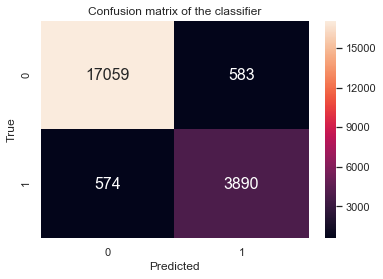

In [146]:
cm = confusion_matrix(y_test, y_final)
sns.set()
ax= plt.subplot()
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, ax=ax, fmt='.0f')
plt.title('Confusion matrix of the classifier')
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()